In [1]:
from pylab import *


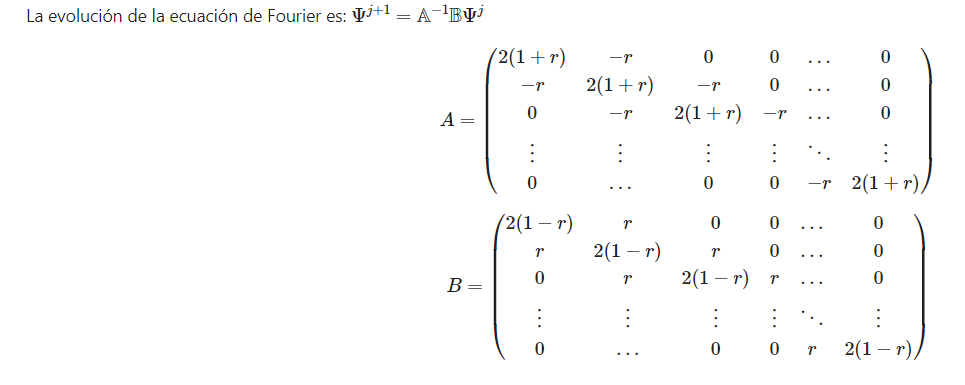

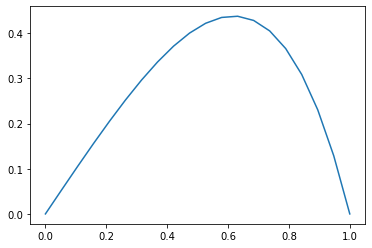

In [2]:
x = linspace(0,1,20)
psi_ini = x*(1-x)*exp(x)
plot(x,psi_ini)
show()

In [3]:
def Mat_AiB(dim,r):
    # dim no considera los puntos a la frontera
    A , B = zeros((dim,dim)) , zeros((dim,dim))
    # diagonales centrales
    for i in range(dim):
        A[i,i] = 2*(1+r)
        B[i,i] = 2*(1-r)
    # diagonales superior e inferior
    for i in range(dim-1):
        A[i,i+1] = -r
        A[i+1,i] = -r
        B[i,i+1] = r
        B[i+1,i] = r
    Ai = inv(A)
    return dot(Ai,B)

In [4]:
Mat_AiB(5,1)

array([[0.07179487, 0.28717949, 0.07692308, 0.02051282, 0.00512821],
       [0.28717949, 0.14871795, 0.30769231, 0.08205128, 0.02051282],
       [0.07692308, 0.30769231, 0.15384615, 0.30769231, 0.07692308],
       [0.02051282, 0.08205128, 0.30769231, 0.14871795, 0.28717949],
       [0.00512821, 0.02051282, 0.07692308, 0.28717949, 0.07179487]])

In [5]:
def CR(psi_ini,x,t,D):
    dx , dt = x[1]-x[0] , t[1]-t[0]
    r = (D*dt)/(dx**2)
    sol_x_t = zeros( (len(x),len(t)) )
    print('r=',r)
    sol_x_t[:,0] = psi_ini
    E = Mat_AiB(len(x)-2,r)
    psi_in = psi_ini[1:-1]
    for i in range(len(t)-1):
        psi_in = dot(E,psi_in)
        sol_x_t[1:-1,i+1] = psi_in
    return sol_x_t

r= 0.8494949494949497


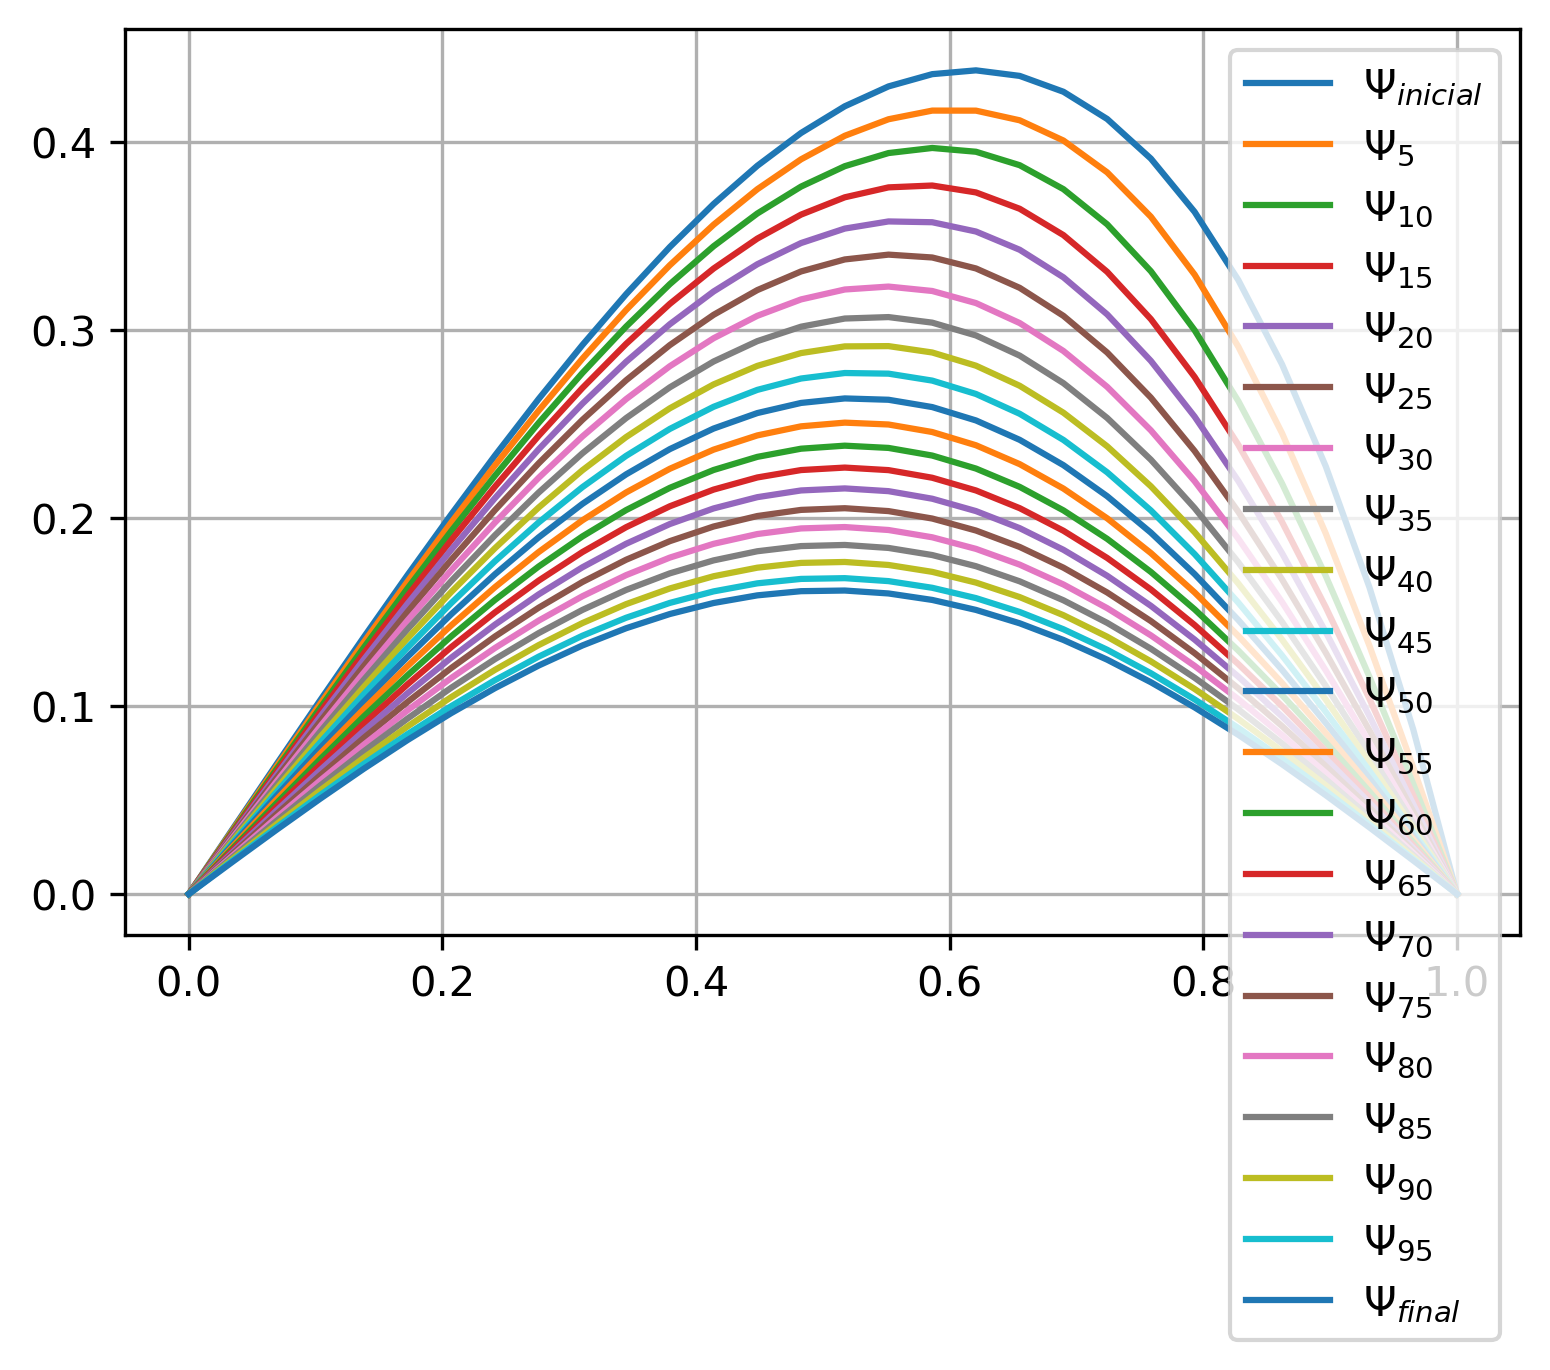

In [6]:
t = linspace(0,1,100)
x = linspace(0,1,30)
psi_inicial = x*(1-x)*exp(x)
sol = CR(psi_inicial,x,t,0.1)
save('Ec_calor_1D.dat',sol)

figure(dpi=300)
plot(x,sol[:,0],label=r'$\Psi_{inicial}$')
for i in range(0,len(t)-5,5):
    plot(x,sol[:,i+5],label=r'$\Psi_{%1.0f}$' %(i+5))
plot(x,sol[:,-1],label=r'$\Psi_{final}$')
legend(),grid()
savefig('Fig_calor1D.pdf')
savefig('Fig_calor1D.png')
show()

In [7]:
nueva_sol = load('Ec_calor_1D.dat.npy')
print(nueva_sol)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.03446178 0.03434835 0.03422963 ... 0.01743746 0.01727524 0.01711422]
 [0.06879377 0.06855944 0.068317   ... 0.03468325 0.03436022 0.0340396 ]
 ...
 [0.16290743 0.15415547 0.14695225 ... 0.03612189 0.03574283 0.03536835]
 [0.0874341  0.07993044 0.07565562 ... 0.018174   0.01798309 0.0177945 ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


r= 0.40001010101010104


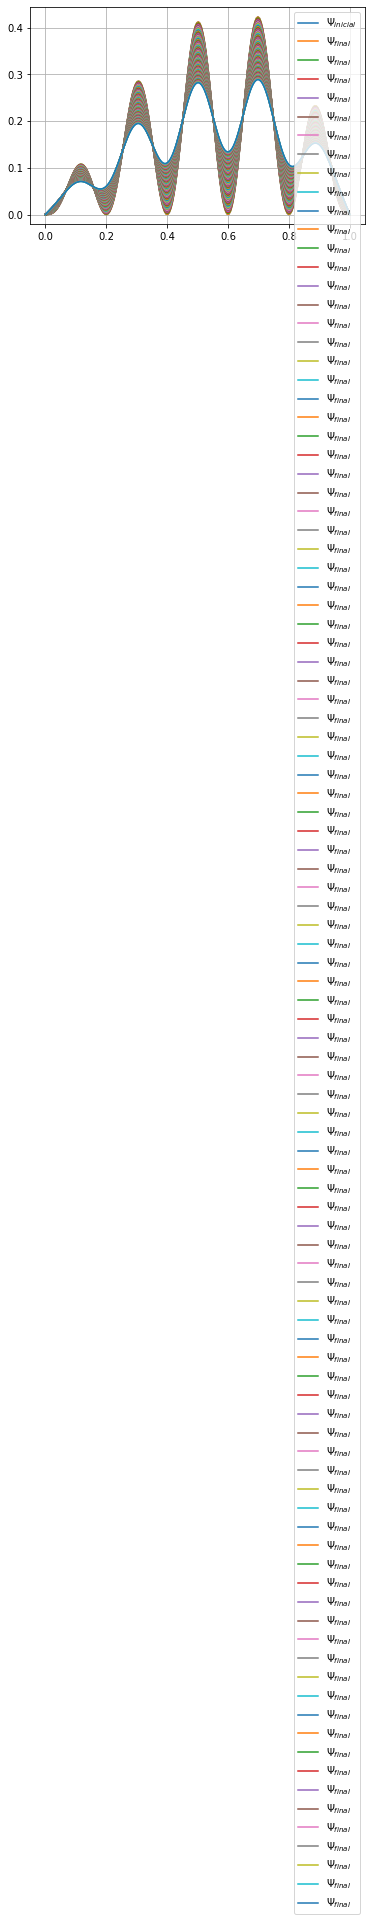

In [8]:
t = linspace(0,0.01,100)
x = linspace(0,1,200)
psi_inicial = x*(1-x)*exp(x)*sin(5*pi*x)**2
plot(x,psi_inicial,label=r'$\Psi_{inicial}$')
psi_final = CR(psi_inicial,x,t,0.1)

plot(x,psi_final,label=r'$\Psi_{final}$')
legend(),grid()
show()